In [1]:
import cv2
from PIL import Image
import numpy as np
from IPython.display import display, Image as IPythonImage
from matplotlib import pyplot as plt

In [2]:
image_path = "./cyto_the_kid.jpg"

In [3]:
img0 = cv2.imread(image_path)
img0_rgb = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)

In [4]:
def showimg(img):
    # cv2 images are in bgr by default and IPython assumes RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(img_rgb))

# Median Filter

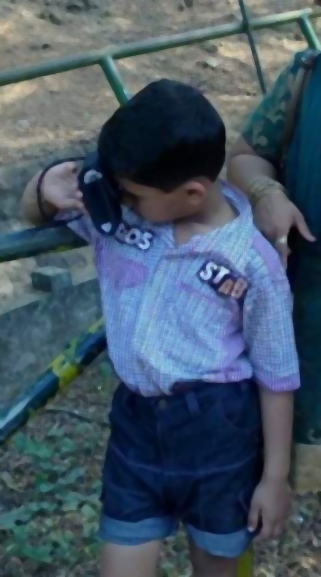

In [5]:
median_filtered_image = cv2.medianBlur(img0, 5)
showimg(median_filtered_image)

# Sharpening Kernel
## Using Kernel (a)
$$ \begin{bmatrix} -1 & -1 & -1 \\
                   -1 & 9 & -1 \\
                   -1 & -1 & -1
    \end{bmatrix}
$$

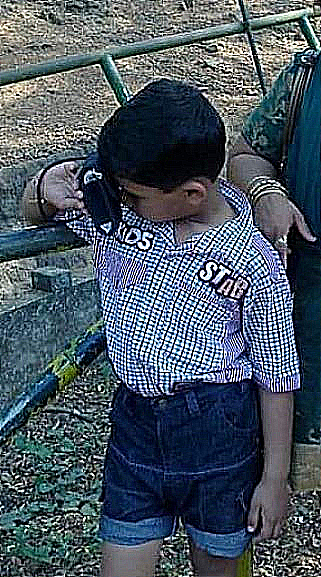

In [6]:
sharpening_kernel = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]])
sharpened_image = cv2.filter2D(img0, -1, sharpening_kernel)
showimg(sharpened_image)

## Using Kernel (b)
$$ \begin{bmatrix} 1 & 1 & 1 \\
                   1 & -7 & 1 \\
                   1 & 1 & 1
    \end{bmatrix}
$$

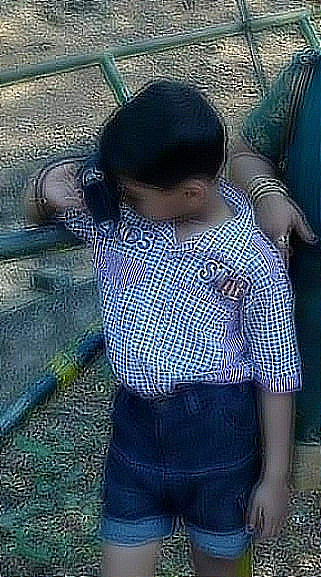

In [7]:
sharpening_kernel = np.array([[1, 1, 1],
                             [1, -7, 1],
                             [1, 1, 1]])
sharpened_image = cv2.filter2D(img0, -1, sharpening_kernel)
showimg(sharpened_image)

# Histogram Equalization
## Defining plotting function

In [8]:
def plothistograms_yuv(yuv_image):
    
    # Split the YUV image into its channels
    Y, U, V = cv2.split(yuv_image)
    # Calculate the histogram for each channel
    hist_Y = cv2.calcHist([Y], [0], None, [256], [0, 256])
    hist_U = cv2.calcHist([U], [0], None, [256], [0, 256])
    hist_V = cv2.calcHist([V], [0], None, [256], [0, 256])
    # Plot the histograms
    plt.figure(figsize=(12, 6))
    # Plot Y channel histogram
    plt.subplot(1, 3, 1)
    plt.title('Y Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.plot(hist_Y, color='gray')
    # Plot U channel histogram
    plt.subplot(1, 3, 2)
    plt.title('U Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.plot(hist_U, color='blue')
    # Plot V channel histogram
    plt.subplot(1, 3, 3)
    plt.title('V Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.plot(hist_V, color='red')

## Plotting Histograms for comparison

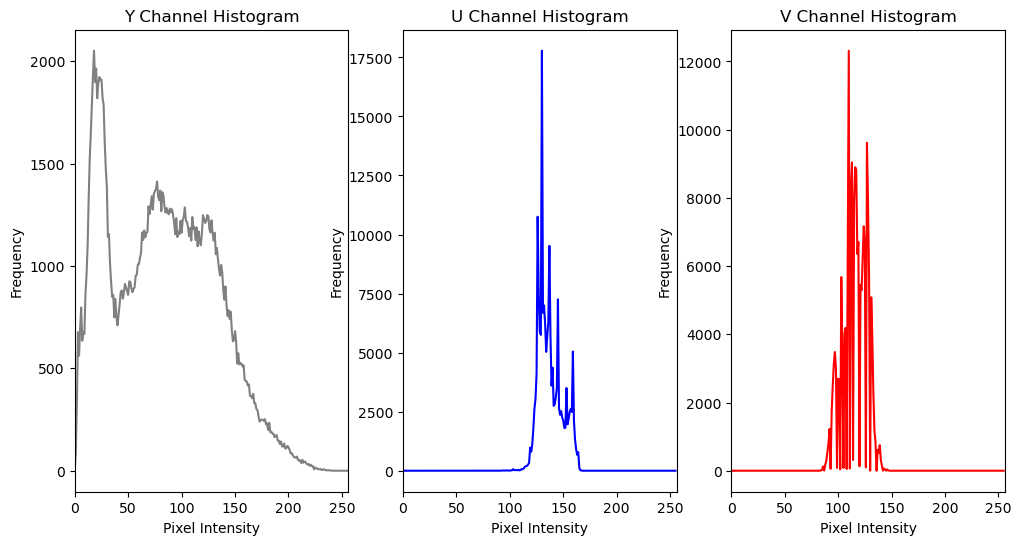

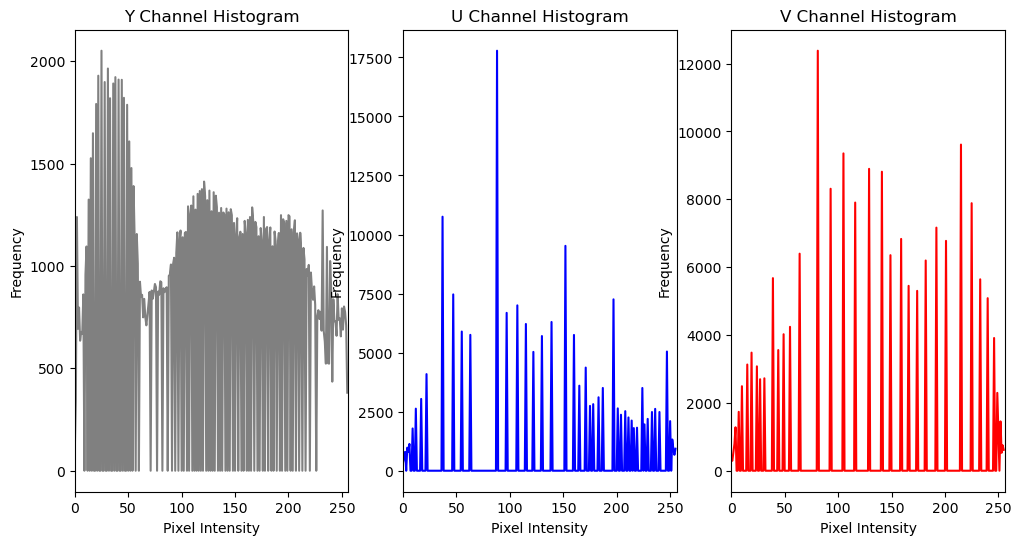

In [9]:
# Convert to YUV color space
yuv_image = cv2.cvtColor(img0, cv2.COLOR_BGR2YUV)
yuv_image_equalized = yuv_image.copy()

plothistograms_yuv(yuv_image)

# Apply histogram equalization to the Y channel
yuv_image_equalized[:, :, 0] = cv2.equalizeHist(yuv_image[:, :, 0])
luminance_equalized_image = yuv_image_equalized.copy()
yuv_image_equalized[:, :, 1] = cv2.equalizeHist(yuv_image[:, :, 1])
yuv_image_equalized[:, :, 2] = cv2.equalizeHist(yuv_image[:, :, 2])

plothistograms_yuv(yuv_image_equalized)

# Convert back to BGR color space
equalized_image_rgb = cv2.cvtColor(yuv_image_equalized, cv2.COLOR_YUV2RGB)
luminance_equalized_image_rgb = cv2.cvtColor(luminance_equalized_image, cv2.COLOR_YUV2RGB)



## Drawing the original and equalized images

(-0.5, 320.5, 576.5, -0.5)

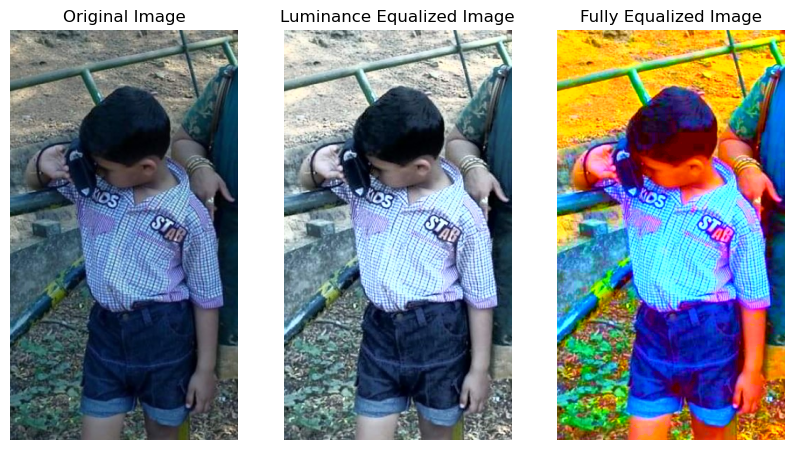

In [10]:

plt.figure(figsize=(10, 20))
plt.subplot(1, 3, 1)
plt.imshow(img0_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(luminance_equalized_image_rgb)
plt.title('Luminance Equalized Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(equalized_image_rgb)
plt.title('Fully Equalized Image')
plt.axis('off')

In [11]:
img0g = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# Edge Detection
## Finding the different types of derivatives in each direction

In [12]:

sobelX = [[0 for i in range(img0g.shape[1])]for j in range(img0g.shape[0])]
sobelY = [[0 for i in range(img0g.shape[1])]for j in range(img0g.shape[0])]
prewittX = [[0 for i in range(img0g.shape[1])]for j in range(img0g.shape[0])]
prewittY = [[0 for i in range(img0g.shape[1])]for j in range(img0g.shape[0])]
laplacian = [[0 for i in range(img0g.shape[1])]for j in range(img0g.shape[0])]

img0g = np.pad(img0g, pad_width=1,mode='constant',constant_values=0)

sobelGx = [[-1,0,-1],[-2,0,2],[-1,0,1]]
sobelGy = [[-1,-2,-1],[0,0,0],[1,2,1]]
prewittGx = [[-1,0,1],[-1,0,1],[-1,0,1]]
prewittGy = [[-1,-1,-1],[0,0,0],[1,1,1]]
laplacianG = [[0,-1,0],[-1,4,-1],[0,-1,0]]

for i in range(img0g.shape[0]-2):
    for j in range(img0g.shape[1]-2):
        sobelX[i][j] = np.sum(np.multiply(sobelGx, img0g[i:i+3,j:j+3]))
        sobelY[i][j] = np.sum(np.multiply(sobelGy, img0g[i:i+3,j:j+3]))
        prewittX[i][j] = np.sum(np.multiply(prewittGx, img0g[i:i+3,j:j+3]))
        prewittY[i][j] = np.sum(np.multiply(prewittGy, img0g[i:i+3,j:j+3]))
        laplacian[i][j] = np.sum(np.multiply(laplacianG, img0g[i:i+3,j:j+3]))



## Plotting all the results

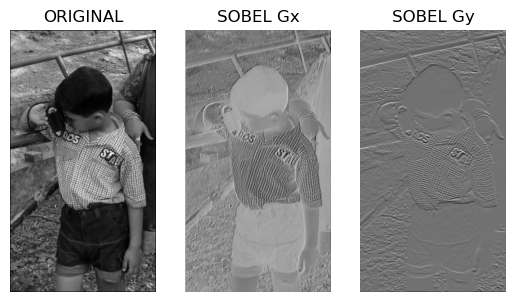

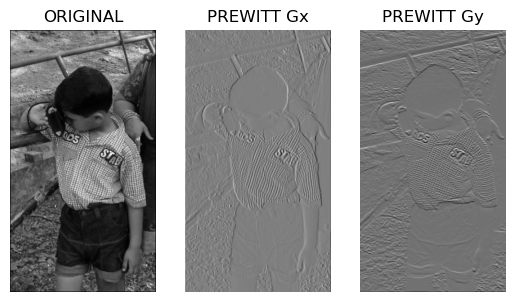

(-0.5, 320.5, 576.5, -0.5)

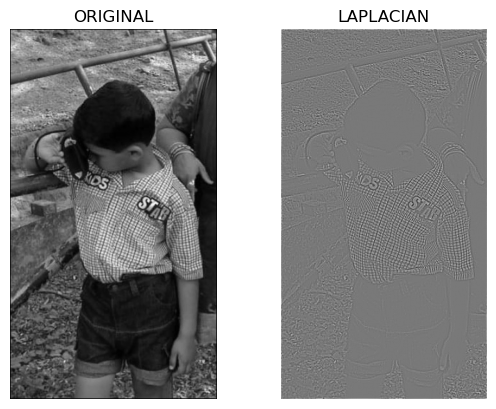

In [13]:

plt.subplot(1,3,1)
plt.title('ORIGINAL')
plt.imshow(img0g, cmap='gray')
plt.axis("off")
plt.subplot(1,3,2)
plt.title('SOBEL Gx')
plt.imshow(sobelX,cmap='gray')
plt.axis("off")
plt.subplot(1,3,3)
plt.title('SOBEL Gy')
plt.imshow(sobelY,cmap='gray')
plt.axis("off")
plt.show()

plt.subplot(1, 3, 1)
plt.title('ORIGINAL')
plt.imshow(img0g,cmap='gray')
plt.axis("off")
plt.subplot(1,3,2)
plt.title('PREWITT Gx')
plt.imshow(prewittX,cmap='gray')
plt.axis("off")
plt.subplot(1,3,3)
plt.title('PREWITT Gy')
plt.imshow(prewittY,cmap='gray')
plt.axis("off")
plt.show()


plt.subplot(1, 2, 1)
plt.title('ORIGINAL')
plt.imshow(img0g,cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title('LAPLACIAN')
plt.imshow(laplacian,cmap='gray')
plt.axis("off")

